#DNN Teq
1. Load and Prepare MNIST Data:

   - Download the MNIST dataset.
   - Reshape the images to a flat format.
   - Normalize the pixel values to be between 0 and 1.

2. Convert Labels to One-Hot Encoding:

   - Change the labels from numbers to a one-hot encoded format.

3. Build the Neural Network (DNN):

   - Create a sequential model.
   - Add layers to the model, including dense layers and dropout layers.

4. Train and Compile the Model Using Training Data:

   - Compile the model with a loss function and optimizer.
   - Train the model on the training data.

5. Evaluate the Model Using Test Data:

   - Test the model on unseen data to see how well it performs.

6. Make Predictions Using the Test Data:

   - Use the model to predict classes for the test images.
   - Compare predicted classes with true labels.

7. Input a New Image for Prediction:

   - Load a new image.
   - Preprocess the image and use the model to predict its class.
   - Display the predicted class.


In [1]:
import numpy as np  # numpy: A library used for mathematical operations.

import matplotlib.pyplot as plt  # matplotlib.pyplot: A library for displaying graphs and images.

from keras.datasets import mnist  # keras.datasets: Contains ready-to-use datasets like MNIST, which has images of digits.

from keras.models import Sequential  # keras.models: Used to create the neural network model that will learn from the data.

from keras.layers import Dense, Dropout  # keras.layers: Used to create the layers inside the neural network.

from keras.utils import to_categorical  # keras.utils: Contains helper functions, like converting numbers to certain formats.

from keras.preprocessing import image  # Importing a library to load images.

In [2]:
#1-Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Reshape the data to fit the DNN model
x_train = x_train.reshape((x_train.shape[0], 28 * 28))  # Convert images to a flat shape (1D array).
x_test = x_test.reshape((x_test.shape[0], 28 * 28))  # Standard size of 28 × 28 for MNIST images.

# Normalize the data
x_train = x_train.astype('float32') / 255.0  # Scale pixel values to be between 0 and 1.
x_test = x_test.astype('float32') / 255.0  # Same normalization for test data.

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [3]:
# 2-Convert labels to a format suitable for use
# Change labels from numbers to one-hot encoded format
y_train = to_categorical(y_train, 10)  # Convert numbers to one-hot encoding (e.g., 0 → [1, 0, 0, 0, 0, 0, 0, 0, 0, 0]).
y_test = to_categorical(y_test, 10)  # Same for test labels.

In [4]:
#3-Build the Neural Network (DNN)
model = Sequential()  # Create a sequential model.

# First layer
# Adding a "Dense" layer with 512 neurons. These neurons will learn patterns from the images.
# `input_shape=(28 * 28,)` means the input will be a flat array of 784 numbers (28 * 28).
model.add(Dense(512, activation='relu', input_shape=(28 * 28,)))

# Add a Dropout layer to reduce overfitting
# This layer helps prevent the model from learning too much from the training data and becoming unable to generalize to new data.
model.add(Dropout(0.2))  # 20% of neurons will be dropped during training.

# Second layer
# Another Dense layer with 512 neurons, where the model will learn more patterns from the data.
model.add(Dense(512, activation='relu'))

# Another Dropout layer
model.add(Dropout(0.2))

# Final layer
# This is the last layer that will output the results. We have 10 neurons for the 10 digits (0 to 9).
# The `softmax` function makes the sum of the values in this layer equal to 1, helping us determine the predicted digit.
model.add(Dense(10, activation='softmax'))  # 10 outputs for the digits.


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [6]:
#4-Compile and Train the Model

# Compile the model
# This line prepares the model and defines how it will be optimized during training.
# "categorical_crossentropy" is the loss function used for multi-class classification.
# "adam" is the optimizer that will be used to improve the model's performance.
# "accuracy" is the metric that will be monitored to see how accurate the model is.
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
# Here we train the model using the training data.
# "batch_size=64" means 64 images will be trained at a time.
# "epochs=10" means training will run for 10 complete passes over the data.
# "validation_data=(x_test, y_test)" are the test data that help us see how well the model is classifying.
model.fit(x_train, y_train, batch_size=64, epochs=10, validation_data=(x_test, y_test))

Epoch 1/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - accuracy: 0.8841 - loss: 0.3798 - val_accuracy: 0.9670 - val_loss: 0.0981
Epoch 2/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 9s 10ms/step - accuracy: 0.9680 - loss: 0.1020 - val_accuracy: 0.9719 - val_loss: 0.0881
Epoch 3/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - accuracy: 0.9765 - loss: 0.0724 - val_accuracy: 0.9775 - val_loss: 0.0753
Epoch 4/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - accuracy: 0.9818 - loss: 0.0564 - val_accuracy: 0.9790 - val_loss: 0.0717
Epoch 5/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 9s 9ms/step - accuracy: 0.9849 - loss: 0.0456 - val_accuracy: 0.9777 - val_loss: 0.0750
Epoch 6/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 8s 9ms/step - accuracy: 0.9859 - loss: 0.0408 - val_accuracy: 0.9811 - val_loss: 0.0676
Epoch 7/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 9s 9ms/step - accuracy: 0.9885 - loss: 0.0360 - val_accuracy: 0.9801 - val_loss: 0.0728
Epoch 8/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 9s 9ms/step - accuracy: 0.9896 - loss: 0.0303 - val_accur

In [7]:
#5- Evaluate the Model Using Test Data

# Evaluate the model using test data.
scores = model.evaluate(x_test, y_test, verbose=0)  # Get the accuracy and loss on the test data.
print(f'Accuracy: {scores[1] * 100:.2f}%')  # Print the accuracy as a percentage.


Accuracy: 98.20%


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


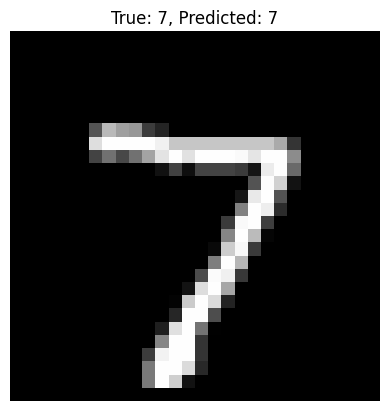

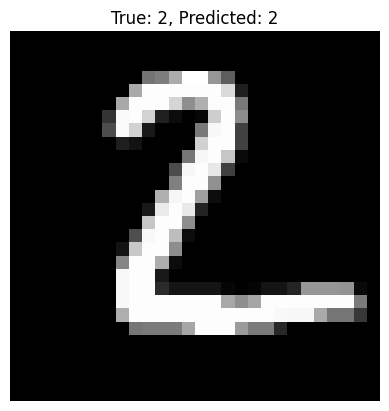

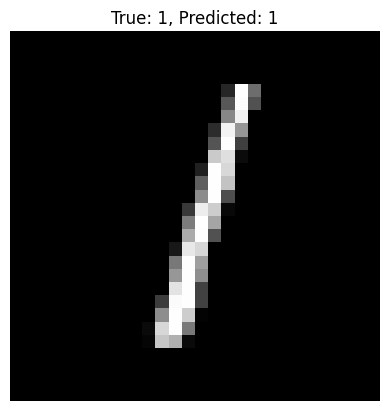

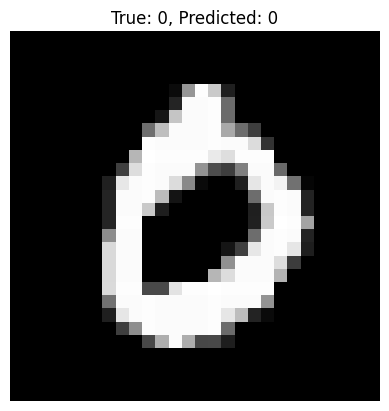

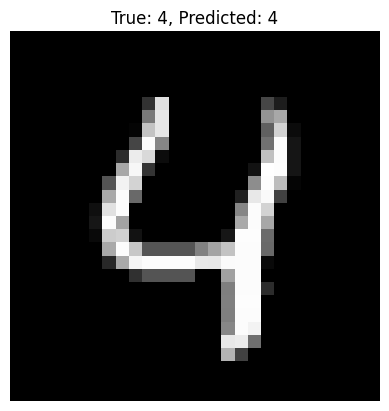

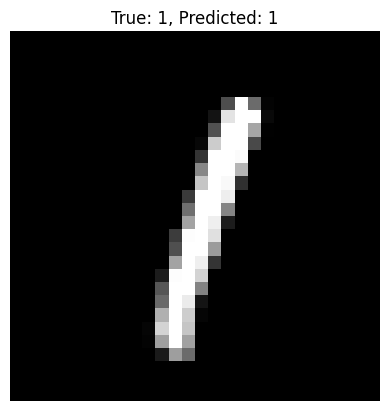

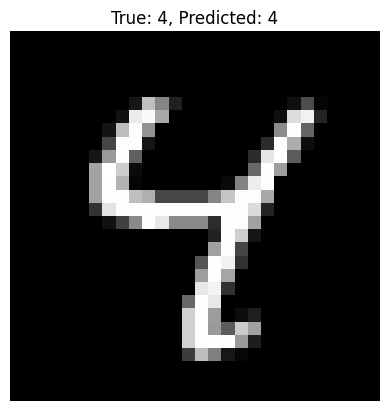

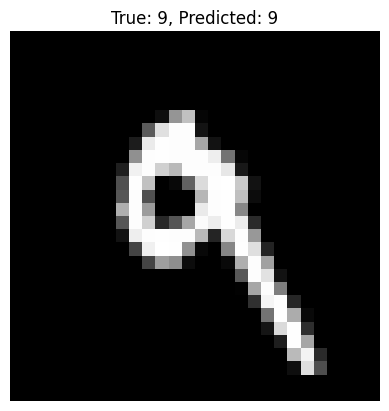

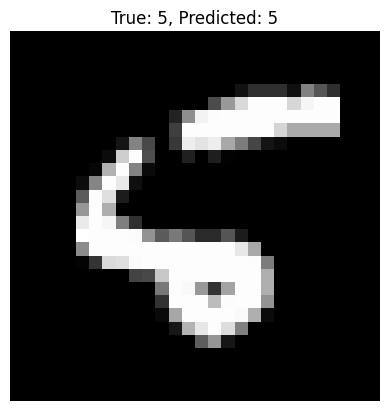

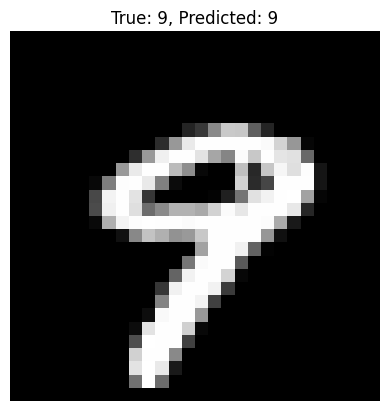

In [8]:
#6- Make Predictions Using the Test Data

# Make predictions using the test data
predictions = model.predict(x_test)  # The model generates predictions for all images in the test set (x_test).

# Convert predictions from probabilities to actual classes by taking the highest probability
predicted_classes = np.argmax(predictions, axis=1)  # np.argmax selects the highest value in each prediction (represents the predicted class).

# Convert true labels (which were in one-hot format) to actual numbers
true_classes = np.argmax(y_test, axis=1)  # Convert true labels from one-hot format to actual numbers (0, 1, 2, ..., 9).

# Display some images with predictions
for i in range(10):  # Show 10 images from the test data.
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')  # Display the image in the correct format (28x28) using grayscale.
    plt.title(f'True: {true_classes[i]}, Predicted: {predicted_classes[i]}')  # Show the title with the true and predicted number.
    plt.axis('off')  # Turn off the axes for a clearer image.
    plt.show()  # Show the image with the prediction.

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted Class for the input image: 8


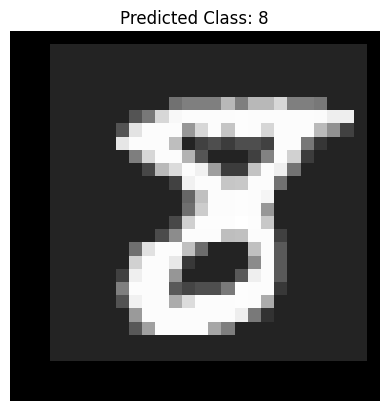

In [11]:
#7-Input a New Image for Prediction

# 1. Load a new image from the path (replace with the actual image path)
img_path = '/content/drive/MyDrive/MNIST-2.webp'  # Specify the actual path of the image you want to input.
img = image.load_img(img_path, target_size=(28, 28), color_mode='grayscale')  # Load the image and resize it.

# 2. Convert the image to an array of pixels
img_array = image.img_to_array(img)  # Convert the image to a numpy array.

# 3. Normalize the image the same way MNIST data was normalized
img_array = img_array.astype('float32') / 255.0  # Scale pixel values to be between 0 and 1.

# 4. Reshape the image to fit the expected input of the neural network (28x28)
img_array = img_array.reshape(1, 28 * 28)  # Convert the image to the appropriate shape (28*28).

# 5. Make a prediction using the trained model
prediction = model.predict(img_array)  # Predict the class for the new image.

# 6. Display the prediction (the expected class)
predicted_class = np.argmax(prediction, axis=1)  # Get the predicted class.
print(f'Predicted Class for the input image: {predicted_class[0]}')  # Print the predicted class.

# Show the input image with the prediction
plt.imshow(img_array.reshape(28, 28), cmap='gray')  # Display the input image.
plt.title(f'Predicted Class: {predicted_class[0]}')  # Show the predicted class in the title.
plt.axis('off')  # Turn off the axes.
plt.show()  # Show the image with the prediction.


In [10]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#CNN Teq
#Steps:

#1-Load the MNIST Dataset: Load the images and labels.

#2-Reshape the Data: Change the shape of the data to fit the neural network model.

#3-Normalize the Data: Scale the pixel values to the range [0, 1].

#4-Convert Labels: Transform the labels into a suitable format for the model.

#5-Build the CNN Model: Create the convolutional neural network model.

#6-Compile the Model: Define the loss function, optimizer, and metrics.

#7-Train the Model: Train the model on the training data.

#8-Evaluate the Model: Assess the model's performance on the test data.

#9-Display Some Results: Show some images with true labels and model predictions.

#10-Input a New Image for Prediction: Load a new image, convert it, and predict the number contained in it.

In [12]:
#1. Download the MNIST data set (so it is divided into test and training data)
#The model predicts the numbers in the images that have been inserted and downloaded

import numpy as np # numpy: A library used for mathematical operations.
import matplotlib.pyplot as plt # matplotlib.pyplot: A library for displaying graphs and images.
from keras.datasets import mnist # keras.datasets: Contains ready-to-use datasets like MNIST, which has images of digits.


# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [13]:
#2. Data restructuring (We do this to make the images clear for the computer to handle them correctly)

# Reshape the data to fit the CNN model
x_train = x_train.reshape((x_train.shape[0], 28, 28, 1))
x_test = x_test.reshape((x_test.shape[0], 28, 28, 1))

In [14]:
#3. Data normalization (Converting pixels, which are colors, into smaller values so that they are easier to deal with)

# Normalize the data
x_train = x_train.astype('float32') / 255.0 # Scale pixel values to be between 0 and 1.
x_test = x_test.astype('float32') / 255.0 # Same normalization for test data.

In [15]:
#4. Converting labels (Putting a special label on each image using One-Hot Encoding)

from keras.utils import to_categorical  # keras.utils: Contains helper functions, like converting numbers to certain formats.

# Convert labels to a suitable format
y_train = to_categorical(y_train, 10) # Convert numbers to one-hot encoding (e.g., 0 → [1, 0, 0, 0, 0, 0, 0, 0, 0, 0]).
y_test = to_categorical(y_test, 10)# Same for test labels.

In [16]:
#5. Building a CNN model (a new, empty model is built and then layers are added inside it, where each layer performs a specific task)

from keras.models import Sequential # keras.models: Used to create the neural network model that will learn from the data.
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout  # keras.layers: Used to create the layers inside the neural network.


# Build the CNN model
model = Sequential()

# First convolutional layer
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Second convolutional layer
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Flatten the data
model.add(Flatten())

# Fully connected layer
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))  # Dropout layer to reduce overfitting
model.add(Dense(10, activation='softmax'))  # Output layer

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [17]:
#6.Model assembly (Here we measure the extent of the error in the model prediction, the improvement of the model, the success of the model prediction)

# Compile the model
# This line prepares the model and defines how it will be optimized during training.
# "categorical_crossentropy" is the loss function used for multi-class classification.
# "adam" is the optimizer that will be used to improve the model's performance.
# "accuracy" is the metric that will be monitored to see how accurate the model is.
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [18]:
#7.Training the model (Here we begin the training process)

# Train the model
# Here we train the model using the training data.
# "batch_size=64" means 64 images will be trained at a time.
# "epochs=10" means training will run for 10 complete passes over the data.
# "validation_data=(x_test, y_test)" are the test data that help us see how well the model is classifying.
model.fit(x_train, y_train, batch_size=64, epochs=10, validation_data=(x_test, y_test))

Epoch 1/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 37s 38ms/step - accuracy: 0.8490 - loss: 0.4802 - val_accuracy: 0.9830 - val_loss: 0.0557
Epoch 2/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 35s 37ms/step - accuracy: 0.9732 - loss: 0.0915 - val_accuracy: 0.9881 - val_loss: 0.0347
Epoch 3/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 40s 36ms/step - accuracy: 0.9802 - loss: 0.0653 - val_accuracy: 0.9882 - val_loss: 0.0327
Epoch 4/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 44s 40ms/step - accuracy: 0.9854 - loss: 0.0506 - val_accuracy: 0.9917 - val_loss: 0.0248
Epoch 5/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 39s 38ms/step - accuracy: 0.9871 - loss: 0.0438 - val_accuracy: 0.9898 - val_loss: 0.0312
Epoch 6/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 34s 36ms/step - accuracy: 0.9885 - loss: 0.0358 - val_accuracy: 0.9918 - val_loss: 0.0256
Epoch 7/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 36s 38ms/step - accuracy: 0.9899 - loss: 0.0342 - val_accuracy: 0.9924 - val_loss: 0.0242
Epoch 8/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 40s 36ms/step - accuracy: 0.9900 - loss: 0.0308 - 

In [19]:
#8.Model Evaluation (The quality of the model being trained is measured)

# Evaluate the model
scores = model.evaluate(x_test, y_test, verbose=0)
print(f'Accuracy: {scores[1] * 100:.2f}%')

Accuracy: 99.16%


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step


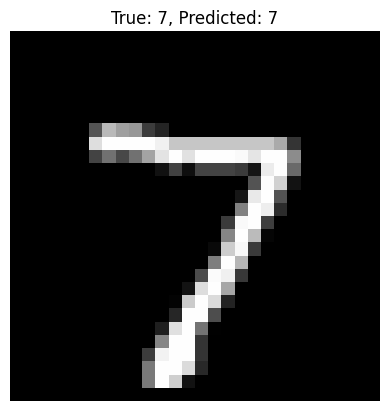

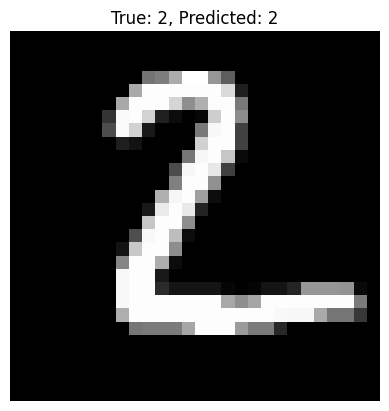

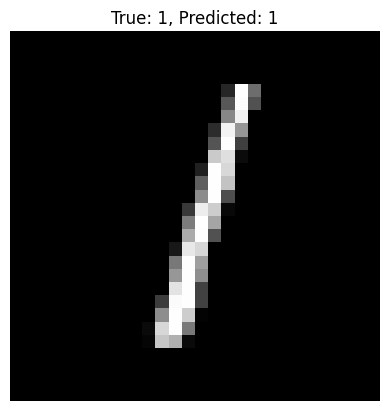

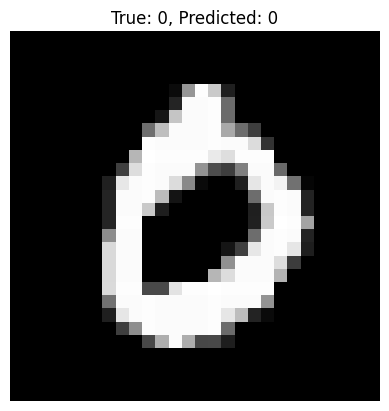

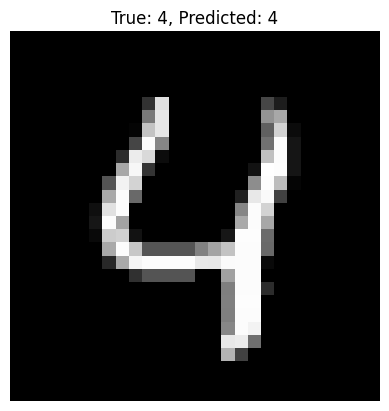

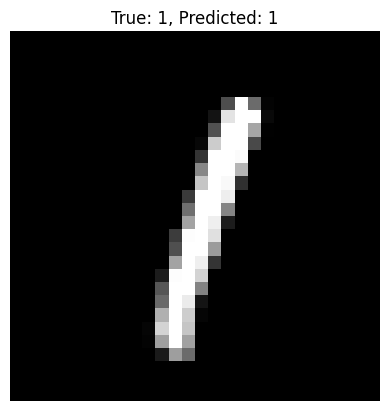

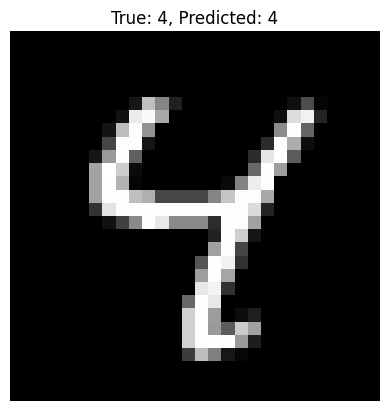

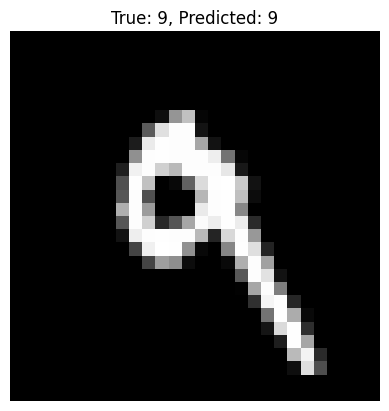

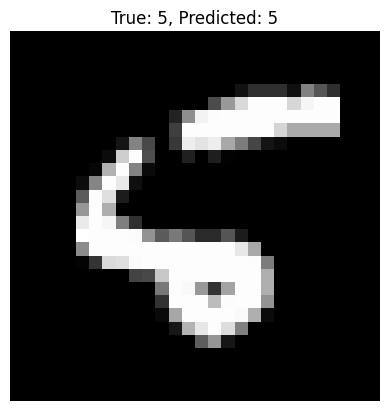

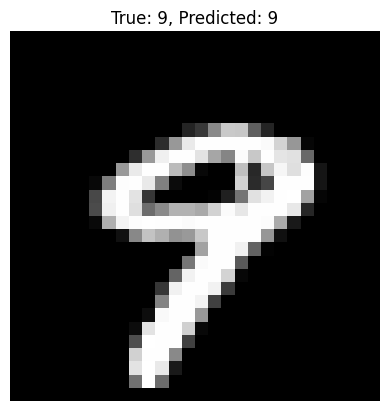

In [20]:
#9.Showing some results (The results are predicted according to the number in the pictures based on the test, determining which results obtained a higher value, displaying the results)

# Display some results using test data
# Make predictions using the test data
predictions = model.predict(x_test) # The model generates predictions for all images in the test set (x_test).

# Convert predictions from probabilities to actual classes by taking the highest probability
predicted_classes = np.argmax(predictions, axis=1) # np.argmax selects the highest value in each prediction (represents the

# Convert true labels (which were in one-hot format) to actual numbers
true_classes = np.argmax(y_test, axis=1)# Convert true labels from one-hot format to actual numbers (0, 1, 2, ..., 9).

# Plot some images with predictions
for i in range(10):# Show 10 images from the test data.
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')# Display the image in the correct format (28x28) using grayscale.
    plt.title(f'True: {true_classes[i]}, Predicted: {predicted_classes[i]}') # Show the title with the true and predicted number.
    plt.axis('off')# Turn off the axes for a clearer image.
    plt.show()  # Show the image with the prediction.

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
Predicted Class for the input image: 8


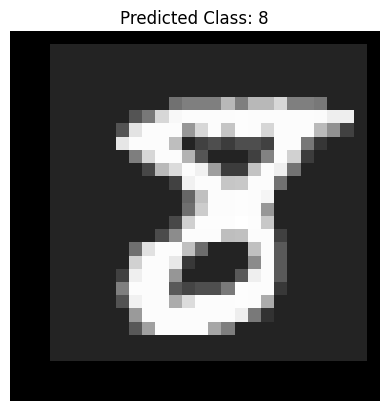

In [21]:
#10. Inserting a new image  (We tested the model by inserting external images and verifying the quality of the model’s work)  to predict

from keras.preprocessing import image # Importing a library to load images.

# 1. Load a new image from the path
img_path = '/content/drive/MyDrive/MNIST-2.webp'  # Specify the actual path of the image you want to input
img = image.load_img(img_path, target_size=(28, 28), color_mode='grayscale')

# 2. Convert the image to an array of pixels
img_array = image.img_to_array(img)

# 3. Normalize the image in the same way as the MNIST data
img_array = img_array.astype('float32') / 255.0

# 4. Reshape the image to fit the expected input of the neural network (28x28x1)
img_array = img_array.reshape(1, 28, 28, 1)

# 5. Predict using the trained model
prediction = model.predict(img_array)

# 6. Display the prediction (the predicted class)
predicted_class = np.argmax(prediction, axis=1)
print(f'Predicted Class for the input image: {predicted_class[0]}')

# Display the input image with the prediction
plt.imshow(img_array.reshape(28, 28), cmap='gray')
plt.title(f'Predicted Class: {predicted_class[0]}')
plt.axis('off')
plt.show()